# Описание проекта

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Мы разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.   
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

**Описание данных:**
* **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
* **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

# Изучение данных

In [ ]:
# !pip install sweetviz --quiet библиотека для создания отчета по данным

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# import sweetviz as sv 

In [2]:
try:
  !gdown --id 1dGadG_Fga0GuGD5hkG6nigfagi25PWeS --quiet
  data = pd.read_csv('insurance.csv')
except:
  data = pd.read_csv('/datasets/insurance.csv')

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


In [ ]:
# report = sv.analyze([data, 'Данные клиентов']) создание отчета
# report.show_html() загрузка

[Отчет по данным](https://drive.google.com/file/d/13jNiHdsHJ-uBuI-G62-M91XljInXlPpZ/view?usp=sharing)

In [ ]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


**Итак,** у нас 5 000 строк и 5 колонок, пропусков нет. Подробная информация в отчете.

Проверим взаимосвязь признаков.

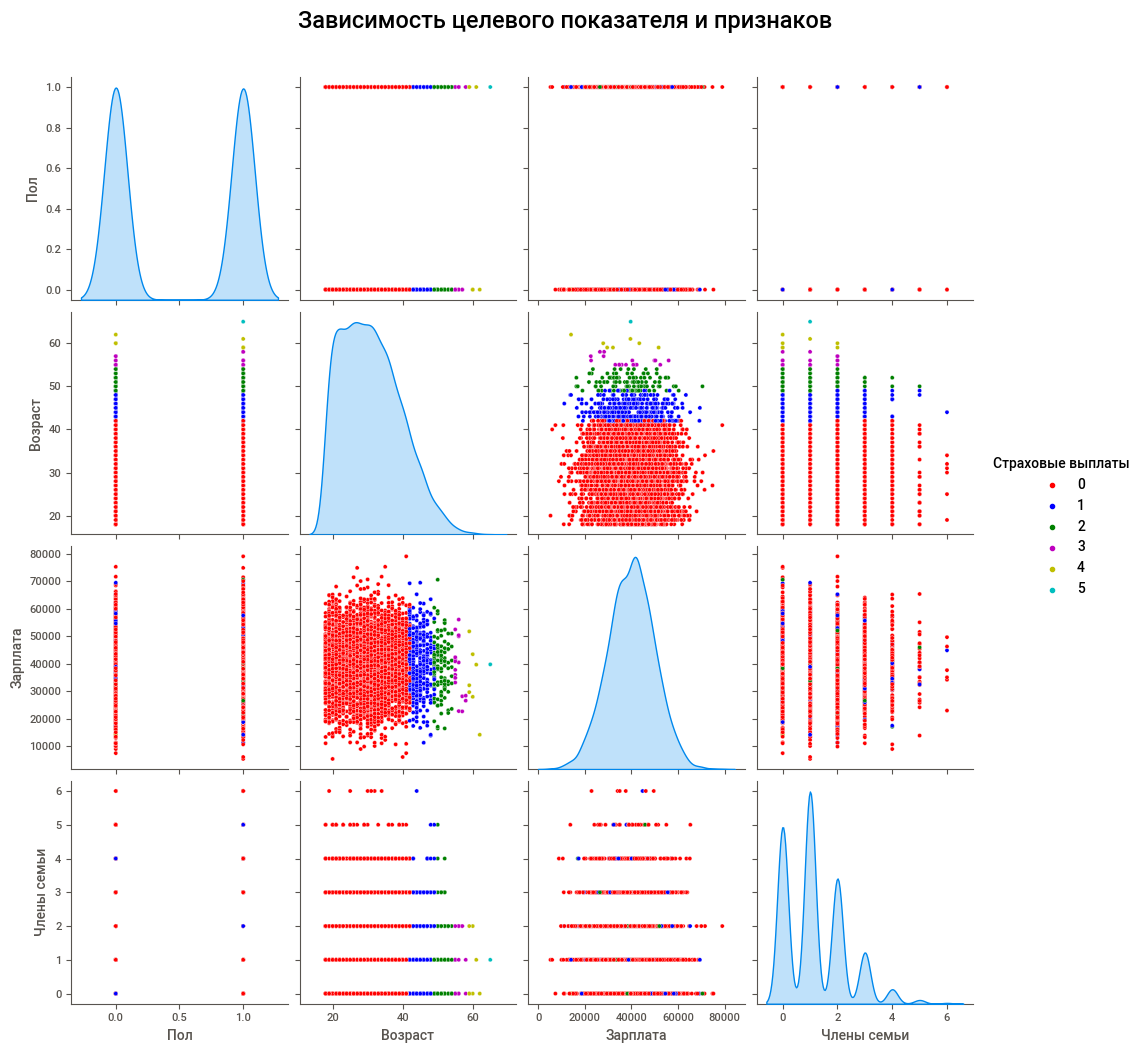

In [ ]:
sns.pairplot(data, hue="Страховые выплаты", diag_kws=dict(hue=None), palette=['r','b', 'g', 'm', 'y', 'c'])
plt.suptitle('Зависимость целевого показателя и признаков', y=1.05, fontsize=17)
plt.show()

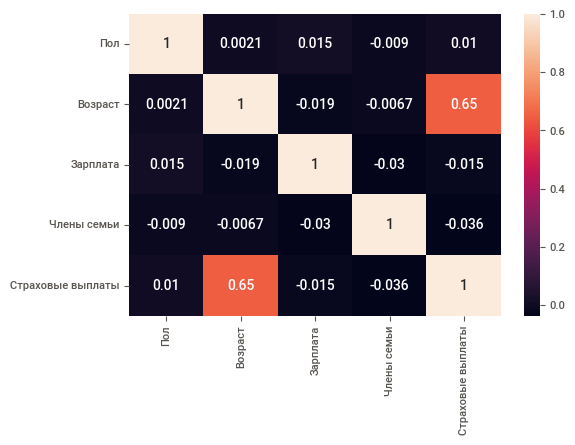

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True)

Проверяем на мультиколлинеарность(это линейная зависимость между переменными). Если между признаками есть сильная зависимость, то качество модели снижается.   
Сильная прямая связь есть между целевым показателем и возрастом, остальные признаки имеют корреляцию близкую к 0.

Если рассматривать здесь мультиколлинеарность, то если бы были признаки, имели линейную зависимость, то значит один вектор(признак), можно было бы представить через другой, и тогда определитель матрицы признаков был бы равен нулю. Тогда и обратной матрицы бы не было.    
Так же здесь мы решаем задачу аналитически(т.е. решаем по формуле напрямую, а не перебираем параметры, в поисках таких, что ошибка была бы минимальна(это решение оптимизационно)). Когда мы решаем задачу оптимизационно, мультиколлинеарность не вызывает переобучение, потому что есть регуляризация при переборе параметров, а когда решаем аналитически проблема переобучения существует.


Разделим данные на признаки и целевой показатель.

In [ ]:
target = data['Страховые выплаты']
features = data.drop(['Страховые выплаты'], axis=1)

In [ ]:
target.value_counts(normalize=True)

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

Разделим данные на тестовую и обучающую выборки.

In [ ]:
features_train, features_test, target_train, target_test \
= train_test_split(features, target, test_size=0.25, random_state=12345)

In [ ]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((3750, 4), (1250, 4), (3750,), (1250,))

# Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Ответ

Не изменится.

### Обоснование

**Доказательство:**  
Для кодировки данных мы хотим умножить наши признаки на матрицу, это возможно если ширина первой матрицы А (𝑚×𝑛) равна высоте второй матрицы В (𝑛×r), тогда итоговая размерность будет (m×r).  
У нас есть формула предсказаний $a = X_iw$, где $X_i$ - новые строки признаков.  
Найдем соотношение $w$ и $w_p$.
$$
w = (X^T X)^{-1} X^T y
$$

$$  
w_p = ((XP)^TXP)^{-1}(XP)^Ty = (P^T(X^TX)P)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}X^Ty => w_p = P^{-1}w
$$

*Использовали здесь такие свойства:*
$$
(AB)^{-1} = B^{-1}A^{-1}
$$
$$
AA^{-1} = E
$$
Обратная матрица есть только у квадратной.    
Если матрица $A$ имеет размер $(m,n)$, тогде $A^T$ имеет размер $(n,m)$. Если мы перемножим эти матрицы, то результирующая матрица будет размера $(m,m)$, то есть будет квадратной.

**Второй вариант доказательства:**
   
Для исходных данных мы решаем это  
    
$$
w = \arg\min_w MSE(Xw, y)
$$
    
Для преобразованных данных решаем это  
    
$$
w_p = \arg\min_w MSE(XPw_p, y)
$$  
    
  
Сделаем замену $w_p$ на $P^{-1}w$
    
 
И подставим:    
    
$$
\arg\min_w MSE(XPP^{-1}w, y)
$$
  
    
    
сократим и получим 
  
    
$$
\arg\min_w MSE(Xw, y)
$$    

    
Пучается если заменить $w_p$ на $P^{-1}w$, то получаем то же самое.   

 

# Алгоритм преобразования

1. Создаем рандомную матрицу $P$
2. Проверяем обратимость матрицы $P$
3. Умножаем наши признаки на созданную матрицу
4. Проверяем качество метрики R2 до и после преобразования
5. Делаем вывод

**Обоснование:**  
Матрица должна быть обратимой, потому что мы в формуле обучения считаем обратную матрицу.   
Чтобы матрица была обратима:
* матрица должна быть квадратная
* матрица должна быть невырожденная(т.е. определитель не равен нулю)  

Чтобы получить обратимую матрицу мы используем функцию, которая генерирует случайные выборки из нормального(гауссова распределения), так как тогда вероятность получить необратимую матрицу близка к нулю. Но чтобы точно получить обратимую матрицу, используем цикл с проверкой на обратимость.  

Две матрицы можно умножить друг на друга, если количество столбцов первой равно количеству строк второй. Так как мы будем умножать матрицу, которая нам дана, на новую матрицу($P$), то размер матрицы $P$ должен быть равен количеству столбцов(т.е. 4), и она должна быть квадратна, так что размер будет 4 на 4.

# Проверка алгоритма

### Создадим модель для неизмененных данных

In [ ]:
features_test.shape

(1250, 4)

In [ ]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1) # добавили единичный столбец
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим ее и получим значение метрики R2.

In [ ]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('R2_score:', r2_score(target_test, predictions).round(2))

R2_score: 0.44


Построим график истинных значений признаков и прямую линейной регрессии.

Text(0.5, 0.98, 'Линейная регрессия')

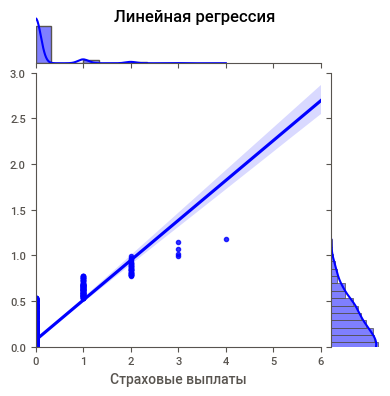

In [ ]:
sns.jointplot(x=target_test, y=predictions,
                  kind="reg", truncate=False,
                  xlim=(0, 6), ylim=(0, 3),
                  color="b", height=4)
plt.suptitle('Линейная регрессия')

### Изменим исходные данные

Создадим матрицу, на которую будем умножать исходные данные.

In [ ]:
def get_rand_matrix(data):
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(data.shape[1], data.shape[1]))
        det = np.linalg.det(matrix)
    return matrix

In [ ]:
matrix = get_rand_matrix(features_train)
matrix

array([[ 0.13111811, -0.53822775, -1.13394916,  0.54195055],
       [ 0.41666566, -0.09766116, -0.63803978,  0.66429778],
       [ 1.74984346, -0.81456515,  0.81444463,  1.42316015],
       [-1.0906946 ,  0.32918678, -0.45862068, -0.1991253 ]])

Умножим созданную матрицу на наши признаки.

In [ ]:
features_train_m = features_train @ matrix
features_train_m.columns = features_train.columns

features_test_m = features_test @ matrix
features_test_m.columns = features_test.columns

display(features_train_m.head())
display(features_test_m.head())

,Пол,Возраст,Зарплата,Члены семьи
3369,63361.290464,-29491.666778,29453.867377,51547.305189
1441,100805.281310,-46922.811151,46889.183468,81997.152921
571,71930.809000,-33481.423496,33452.798458,58512.940715
225,78931.849521,-36740.074727,36708.024824,64208.238521
2558,88553.647885,-41219.560863,41188.925796,72033.427347


,Пол,Возраст,Зарплата,Члены семьи
3183,68253.282306,-31769.946788,31740.450830,55524.371315
1071,75436.905217,-35111.982503,35069.744384,61371.019257
2640,73684.790937,-34297.539685,34262.101482,59941.492029
2282,60902.885880,-28348.820325,28329.912378,49539.259300
1595,70006.459096,-32585.293224,32549.791143,56952.845851


Проверим метрику качества для новых данных.

In [ ]:
model_m = LinearRegression()
model_m.fit(features_train_m, target_train)
predictions = model_m.predict(features_test_m)
print('R2_score:', r2_score(target_test, predictions).round(2))

R2_score: 0.44


# Вывод

Нашей задачей было защитить данные клиентов и при этом, чтобы качество модели не ухудшилось. Для этого было решено умножить исходные данные на случайную обратимую матрицу. В качестве метрики выбрана R2. 
Алгебраически доказали с помощью свойств матриц, что качество модели не изменится.  
Использовали класс LinearRegression, где явно прописаны формулы построения модели обучения.
Обучили модель на исходных данных и на преобразованных. Сравнили показатели метрики, она не изменилась и равна 0.44, что довольно хорошо.  
В итоге имеем таблицу, где данные представлены числами и информация о клиентах защищена.